# Problem Set 2

Related lectures: [Control Flow](https://datascience.quantecon.org/../python_fundamentals/control_flow.html), [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html), and [Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html)

## Question 1
For the tuple `foo` below, use a combination of `zip`, `range`, and `len` to mimic `enumerate(foo)`.

Verify that your proposed solution is correct by converting each to a list and checking equality with `==`

HINT: You can see what the answer should look like by starting with `list(enumerate(foo))`.

In [1]:
foo = ("good", "luck!")

# Your code goes here

# find the range of the tuple
number = range(len(foo))
print(number)

# form a list of number within range
n = list(number)
print(n)

# zip the number with the element in foo
l = zip(n, foo)

# return result 
result = list(l)
print(result)

#check if result mimic emumerate(foo)
result == list(enumerate(foo))


range(0, 2)
[0, 1]
[(0, 'good'), (1, 'luck!')]


True

## Question 2

Write a for loop that uses the lists of cities and states to print a message saying `“{city} is in {state}”`, where `{city}` and `{state}` are replaced by different values on each iteration.  You are *not* allowed to use `zip`.

In [ ]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

# Your code here
for i, city in enumerate(cities):
    state = states[i]
    print(f"{city} is in {state}")


Now, do the same thing with a `for` loop using `zip`.

In [2]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

# Your code here
# form a list of (city,state) pairs using zip
p = list(zip(cities, states))
print(p)

for i in range(len(p)):
    print(p[i][0], "is in", p[i][1])

[('Phoenix', 'Arizona'), ('Austin', 'Texas'), ('San Diego', 'California'), ('New York', 'New York')]
Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Write a function that takes in a tuple as `(city, state)` and returns a string  `“{city} is in {state}”` with the values substituted.

In [3]:
# Your function here
import numpy as np
# generate a random number i
i = np.random.poisson()
print(i)

#def sentence():
#    city = p[i][0]
#    state = p[i][1]
#    return print(city, "is in", state)
#sentence()


# You're technically using Zip but you should do something like this
def sentence(city, state):
    for city, state in list(zip(cities, states)):
        print(f"{city} is in {state}")
sentence("Phoenix","Arizona")

# Also your function needs to take a tuple as an argument.


0
Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


## Question 3

This exercise explores the concept of higher order functions, or functions
that can be an input or output of another function.

Below is code that implements a version of the generalized Cobb-Douglas production function which takes the form $ F(K, L) = z K^{\alpha_1} L^{\alpha_2} $.

It takes as an argument `alpha_1`, `alpha_2`, and `z` and then
*returns a function* that implements that parameterization of the
Cobb-Douglas production function.

In [5]:
def cobb_douglas_factory(alpha_1, alpha_2, z=1.0):
    """
    Return a function F(K, L) that implements the generalized Cobb-Douglas
    production function with parameters alpha_1, alpha_2, and z

    The returned function takes the form F(K, L) = z K^{\alpha_1} L^{\alpha_2}
    """
    # I'm defining a function inside a function
    def return_func(K, L):
        return z * K**alpha_1 * L**alpha_2

    # Notice I'm returning a function! :mind_blown:
    return return_func

We can use this function in two steps:

1. Call it with `alpha_1`, `alpha_2`, and `z` and get a function in return.  
1. Call the returned function with values of `K` and `L`.  


Here’s how we would repeat the first Cobb-Douglas example from above:

In [6]:
# step 1
F2 = cobb_douglas_factory(0.33, 1-0.33)
# step 2
F2(1.0, 0.5)


0.6285066872609142

Now, it is your turn…

Re-write the `returns_to_scale` function above as we had in [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html) to accept an additional argument
`F` that represents a production function. The function should take in `K` and `L`
and return output.

We’ve written some code below to get you started.

In [7]:
def returns_to_scale2(F, K, L, gamma): 
    # Y0 is the initial out with L and K
    Y0 = F(K, L)
    # Y1 is the new output scale K and L by gamma
    Y1= F(gamma * K, gamma * L)
    # y is the output ratio
    y = Y1/Y0
    # compute returns to scale as percentage of output change relative to input change 
    return y/gamma
# test new function using the original F2
solution1 = returns_to_scale2(F2, 1.0, 0.5, 2) 

print(solution1)


1.0


Test out your new function using the original `F2` that we defined above and
using the `cobb_douglas` function defined earlier in the lecture. You can use
similar sets of values to what we used in class for `K` and `L`.

Do you get the same answer?

In [8]:
# test new function using cobb_douglas function 
def cobb_douglas(K, L):
    # Create alpha and z
    z = 1
    alpha = 0.33

    return z * K**alpha * L**(1 - alpha)

Y0_cd = cobb_douglas(1.0, 0.5)
Y1_cd = cobb_douglas(1.0*2, 0.5*2)
y_cd = Y1_cd/Y0_cd # y_cd is the output ratio 

solution2 = return_to_scale_cd = (y_cd/2)
print(solution2)

# test if they give same result 
solution2==solution1

1.0


True

## Question 4

Let’s use our `cobb_douglas_factory` and `returns_to_scale2` functions
to study returns to scale.

What are the returns to scale when you set `alpha_1 = 0.3` and `alpha_2 = 0.6`?

In [9]:
# test with alpha_1 = 0.3 and alpha_2 = 0.6
F3 = cobb_douglas_factory(0.3, 0.6)
returns_to_scale2(F3, 1.0, 0.5, 2)

0.9330329915368075

What about when you use `alpha_1 = 0.4` and `alpha_2 = 0.65`?

In [10]:
# test with alpha_1 = 0.4 and alpha_2 = 0.65
F4 = cobb_douglas_factory(0.4, 0.65)
returns_to_scale2(F4, 1.0, 0.5, 2)

1.0352649238413774

What do returns to scale have to do with the quantity $ \alpha_1 + \alpha_2 $? When will returns to scale be greater or less than 1?

In [21]:
# your code here (optional)
print("Returns to scale is equal to 1(constant) when alpha1 + alpha2 = 1",
      "Returns to scale is greater than 1(increasing) when alpha1 + alpha2 > 1", 
      "Returns to scale is less than 1(decreasing) when alpha1 + alpha2 < 1")

Returns to scale is equal to 1(constant) when alpha1 + alpha2 = 1 Returns to scale is greater than 1(increasing) when alpha1 + alpha2 > 1 Returns to scale is less than 1(decreasing) when alpha1 + alpha2 < 1


## Question 5

Take a production function of only labor, `L`, with the following form

$$
f(L) = \begin{cases} L^2 & \text{ for } L \in [0, 1)\\
                    \sqrt{L} & \text{ for } L \in [1, 2]
        \end{cases}
$$

Write a function to calculate the marginal product of labor (MPL) numerically by using a method similar to what we did in class.

In [12]:
# your code here
import numpy as np

def funcL(L):
    if 0 <= L and L < 1:
        return(L**2)
    elif L <= 2:
        return(np.sqrt(L))

# by the definition of the marginal product of labor
def MPL(L, epsilon):
    return ((funcL(L + epsilon))- funcL(L))/ epsilon

# for example take epsilon as an infitisimal number 1e-4 and L=1
MPL(1, 1e-4) 

0.49998750062396624

Plot the MPL for $ L \in [0,2] $  (you can choose some sort of grid over those numbers with `np.linspace`).

Text(0, 0.5, 'MPL')

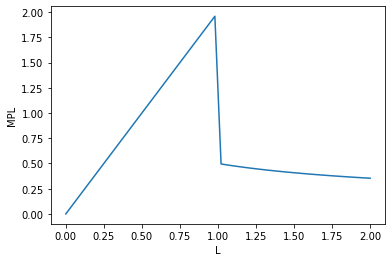

In [13]:
# your code here
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x = np.linspace(0, 2-1e-4)
y = []
for i in x:
    y.append(MPL(i, 1e-4))

# plot MPL for 𝐿∈[0,2]
ax.plot(x, y)
ax.set_xlabel("L")
ax.set_ylabel("MPL")



Consider the scenario where you increase the scale of production by a factor of 10 percent more labor. Plot the returns to scale for a grid on $ L \in [0, 1.5] $.
*Hint:* For this, you may need to write your own version of the `returns_to_scale` function specific to this production function or carefully use the one above. Either way of implementation is fine.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0, 0.5, 'returns_to_scale')

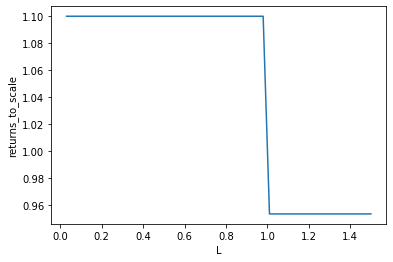

In [14]:
# your code here
def funcL1(L):
    if 0 < L and L <= 1:
        result = L**2
    elif L <= 1.5:
        result = np.sqrt(L)
    return result

# compute returns to scale as percentage of production change relative to input(L) change 
def returns_to_scale(L, gamma):
    fl1 = funcL1(L)
    if 0 < L and L <= 1:
        fl2 = (L*gamma)**2
    elif L <= 1.5:
        fl2 = np.sqrt(gamma*L)
    return (fl2/fl1)/gamma


import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x = np.linspace(0, 1.5)
y = []

# gamma =1.1 if increase the scale by 10 percent more labor
for i in x:
    y.append(returns_to_scale(i, 1.1))

# plot returns_to_scale for 𝐿∈[0,1.5]
ax.plot(x, y)
ax.set_xlabel("L")
ax.set_ylabel("returns_to_scale")



Compare these returns to the scale of the Cobb-Douglas functions we have worked with.
#### In this production function, it is increasing returns to scale when f(L) = L**2 and it is decreasing return to scale when f(L) = L**0.5. 
#### In each interval, the returns to scale is constant because it doesn't change when L changes.
#### In this question, the returns to scale follows the rule we have discovered in the previous question.

## Question 6

Define a function that takes as input a list $y$ *of arbitrary length* that contains the monthly returns of an asset, (where each element in the list represents the returns in that month) along with a keyword argument for your monthly discount rate with the default value $r=0.05$, and returns the present daily value of the asset.

*Hint: since you don't know the length of the list $y$, you should check that first.*

In [15]:
# Your code goes here

# define a function that calculate net present value using the sum of discounted cash flow
def NPV(y, r = 0.05):
    DCFs = [y[i]/(1+r)**i for i in range(len(y))]
    return print(sum(DCFs))

# alternative method: assign a initial value to present_value and then using +=
def present_value(y, r = 0.05):
    present_value = 0
    for i in range(len(y)):
        present_value += y[i]/(1+r)**i
    return present_value

Use your function to answer the following question:

If you had a monthly discount factor of $r=0.1$, what is the most that you should pay for an asset that pays dividends of: \$1 immediately when purchasing, $10 after the first month, \$14 after the second month, \$18 after three months, and finally \$100 after six months?

*Hint: create a list that contains the returns of your asset, and use it as an input to your function. Remember to change the discount factor.*

In [16]:
# your code here

# a list that contains the returns of asset
y1 = [1,10,14,18,0,0,100]

print(len(y1))
NPV(y1, r = 0.1)
present_value(y1, r = 0.1)


7
91.6322164463995


91.6322164463995